In [152]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import pandas as pd
from sklearn.linear_model import LinearRegression

def millions_formatter(x, pos):
    return '{:.0f}M'.format(x/1000000)

df = pd.read_csv('All_player_with_score.csv')
df['goals'] =df['goals'].fillna('0')
df['mk_value'] =df['mk_value'].fillna('0')
df.sample(40)

,Unnamed: 0,Unnamed: 0.1,season_id,player_id,goals,assists,ppg,yellow_cards,second_yellow_cards,red_cards,...,date_of_birth,height,foot,position,mk_value,agent,apprance,score,goals_conceded,clean_sheets
5306,5306,5306.0,2021,131275,20.0,19.047619,0.000000,56.666667,50.00,0.0,...,25-Apr-93,1.83,right,Centre-Forward,2200000.0,Promoesport,93.939394,46.106898,NaN,NaN
14350,14350,14350.0,2021,18944,2.857143,0.000000,0.000000,16.666667,50.00,50.0,...,2-Feb-87,1.94,right,Centre-Back,10000000.0,AC Talent,96.428571,23.983939,NaN,NaN
8452,8452,8452.0,2021,162434,2.857143,0.000000,38.333333,3.333333,18.75,0.0,...,14-Apr-95,1.90,right,Centre-Back,15000000.0,Sports360 GmbH,96.296296,79.363203,NaN,NaN
205,205,205.0,2021,89701,2.857143,19.047619,70.666667,20.000000,12.50,0.0,...,17-Apr-89,1.71,right,Central Midfield,6000000.0,Fernando Felicevich,100.000000,67.886503,NaN,NaN
13215,13215,13215.0,2021,197122,0.0,0.000000,0.000000,3.333333,31.25,0.0,...,3-Feb-92,1.86,right,Centre-Back,1500000.0,GLOBAL ASES,50.000000,38.002280,NaN,NaN
7608,7608,7608.0,2021,514514,0.0,0.000000,0.000000,0.000000,0.00,0.0,...,17-Aug-98,1.86,right,Centre-Forward,300000.0,Implica-T,21.428571,9.348545,NaN,NaN
8846,8846,8846.0,2021,193900,8.571429,9.523810,66.666667,43.333333,25.00,0.0,...,27-May-95,1.87,right,Right-Back,10000000.0,ROGON,93.103448,74.381110,NaN,NaN
10221,10221,10221.0,2021,15956,0.0,14.285714,0.000000,16.666667,25.00,0.0,...,21-Nov-85,1.72,right,Right-Back,5000000.0,Bahía Internacional,100.000000,60.309439,NaN,NaN
3237,3237,3237.0,2021,470596,0.0,0.000000,0.000000,0.000000,0.00,0.0,...,8-May-01,1.78,right,Central Midfield,200000.0,Unique Sports Group,0.000000,0.000000,NaN,NaN
952,952,952.0,2021,353399,0.0,33.333333,0.000000,40.000000,6.25,0.0,...,29-Mar-96,1.72,left,Right Midfield,150000.0,score agencies,81.481481,52.455220,NaN,NaN


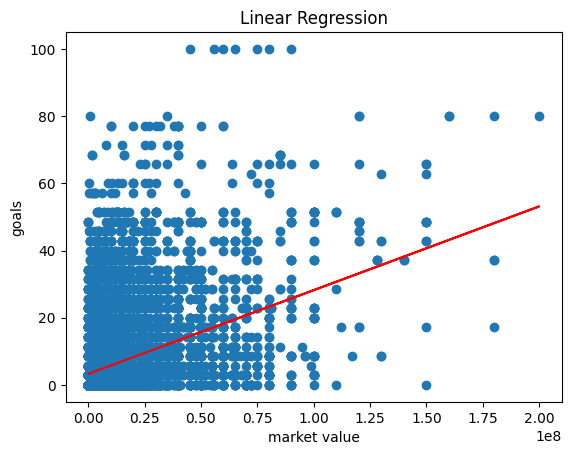

In [153]:
plt.scatter(df['mk_value'],df['goals'] )


model = LinearRegression().fit(df[['mk_value']], df['goals'])

plt.plot(df[['mk_value']], model.predict(df[['mk_value']]), color='red')


plt.xlabel('market value')
plt.ylabel('goals')
plt.title('Linear Regression')

plt.show()


In [154]:
attackers = ['Centre-Forward', 'Right Winger', 'Left Winger']
df_attackers = df.loc[(df['position'] == attackers[0]) | (df['position'] == attackers[1]) | (df['position'] == attackers[2])]


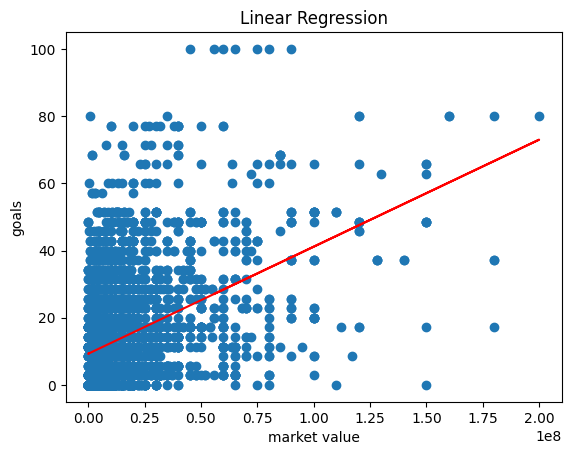

In [155]:
plt.scatter(df_attackers['mk_value'],df_attackers['goals'] )


model = LinearRegression().fit(df_attackers[['mk_value']], df_attackers['goals'])

plt.plot(df_attackers[['mk_value']], model.predict(df_attackers[['mk_value']]), color='red')


plt.xlabel('market value')
plt.ylabel('goals')
plt.title('Linear Regression')

plt.show()

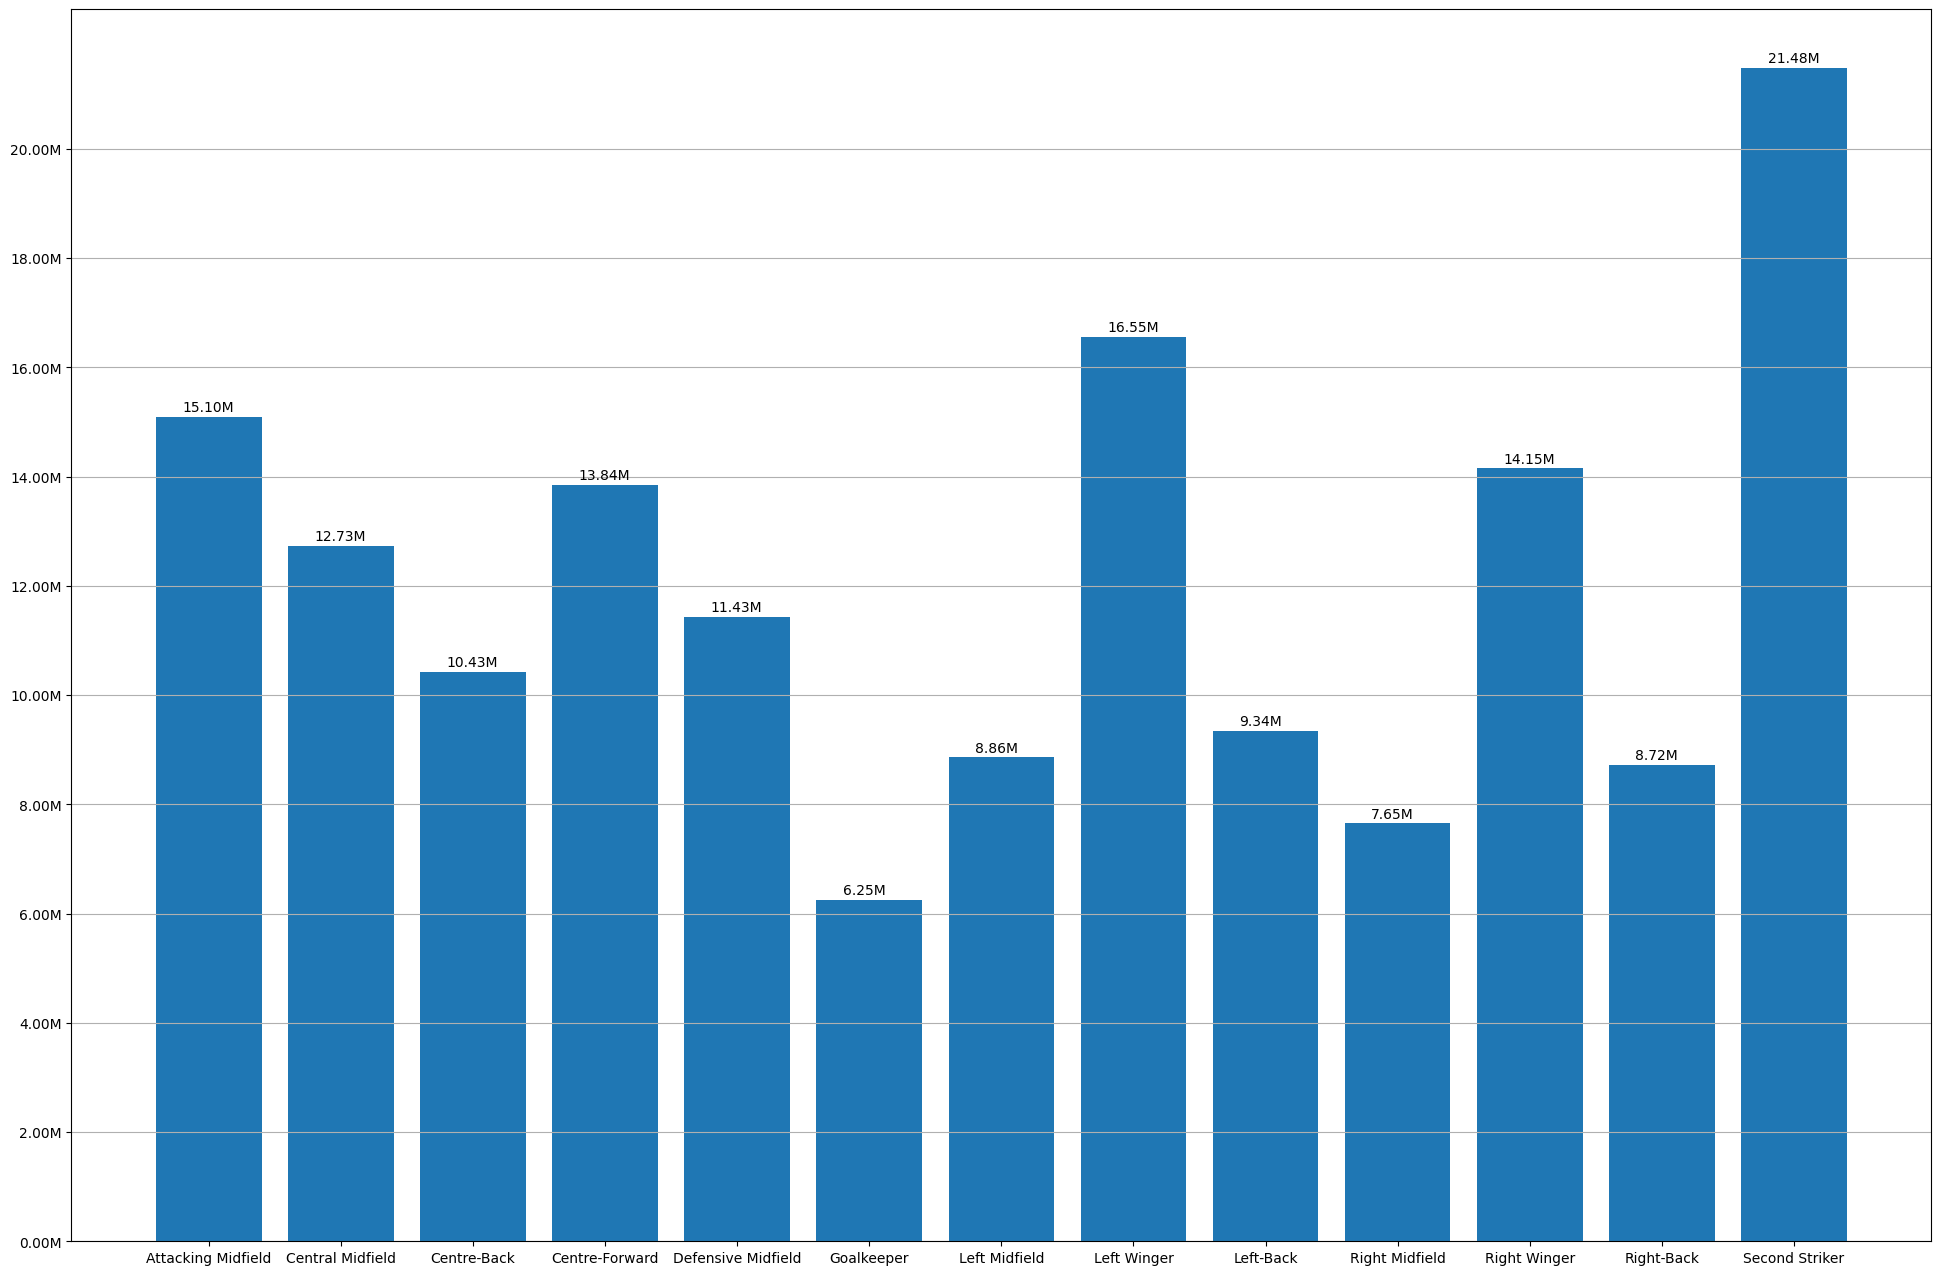

In [156]:
import numpy as np

def millions_formatter(x, pos):
    return '{:.2f}M'.format(x/1000000)

value = df.groupby('position').mean()['mk_value']

x_pos = np.arange(len(value.index))

fig1, ax1 = plt.subplots(figsize=(24,16))

b1 = ax1.bar(value.index, value.values)

plt.yticks([0,2000000,4000000,6000000,8000000,10000000,12000000,14000000,16000000,18000000,20000000])
ax1.yaxis.set_major_formatter(FuncFormatter(millions_formatter))
for i in range(len(value.index)):
    ax1.text(x_pos[i] - 0.2, value.values[i] + 100000, millions_formatter(value.values[i], x_pos[i]), color= 'black')
plt.grid(axis='y')
plt.show()


In [157]:
df1 = pd.read_csv('result_5.csv').groupby('league_name').count().unstack().reset_index()
df1 = df1.drop(columns=['level_0'])
df1 = df1.rename(columns={0:'goals'})
df1

,league_name,goals
0,Bundesliga,256
1,LaLiga,378
2,Ligue 1,353
3,Premier League,589
4,Serie A,395


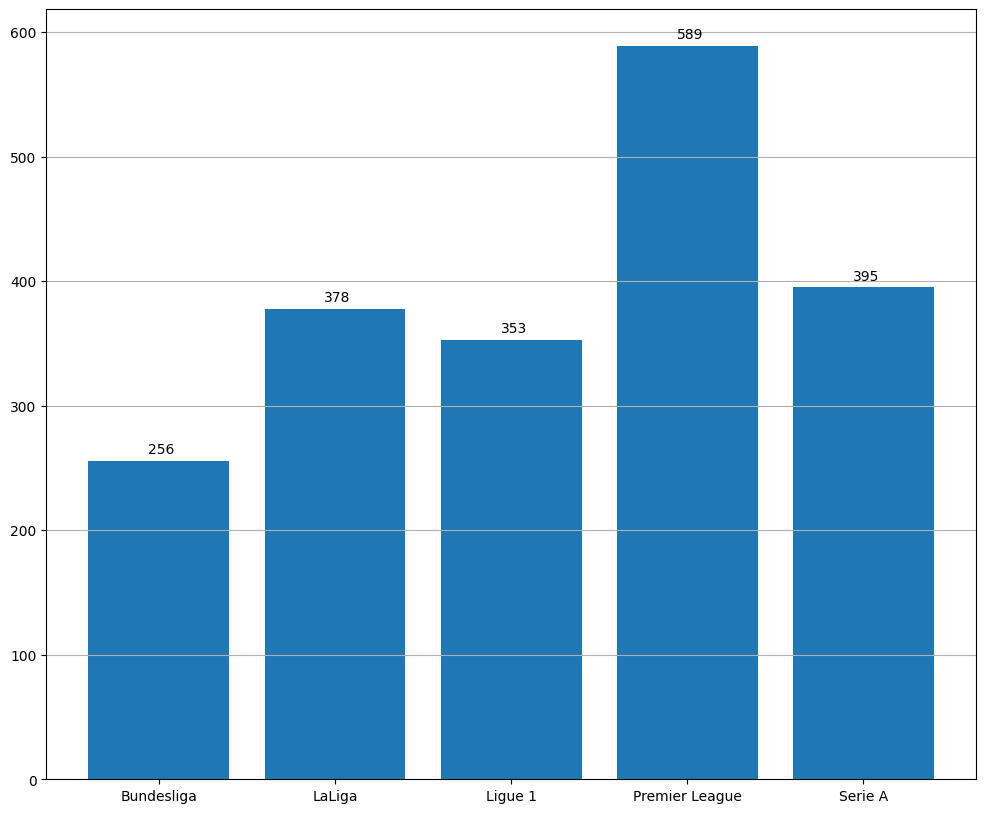

In [158]:
fig1, ax1 = plt.subplots(figsize=(12,10))

x_pos = np.arange(len(df1.league_name))

b1 = ax1.bar(df1.league_name, df1.goals)

for i in range(len(x_pos)):
    ax1.text(x_pos[i] - 0.06, df1.goals[i] + 6, str(df1.goals[i]))

plt.grid(axis='y')

plt.show()

In [ ]:
df6 = pd.read_csv('Result_8.csv')

for index, row in df6.iterrows():
    try:
        row['fee'] = float(row['fee'])

    except:
        df6.drop(index, inplace=True)




In [244]:
df6.reset_index(drop=True, inplace=True)
df6['fee'] = df6['fee'].astype(float)


In [281]:
df7 = df6.groupby('season_id').mean().unstack().reset_index()
df7 = df7[(df7['season_id']>=2017) & (df7['season_id']<=2021)]
df7 = df7.rename(columns={0:'fee'})
len(df7.fee)

5

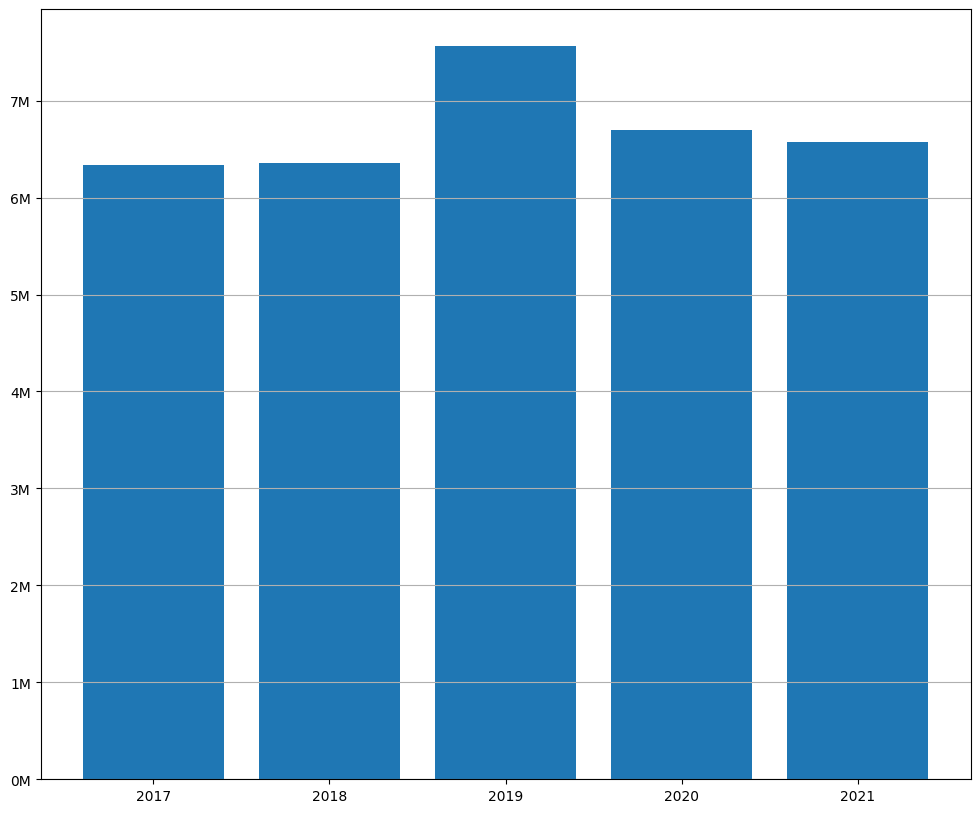

In [287]:

def millions_formatter(x, pos):
    return '{:.0f}M'.format(x/1000000)

x_pos = np.arange(len(df7.fee))
fig3, ax3 = plt.subplots(figsize=(12,10))

bar = plt.bar(df7.season_id, df7['fee'])
ax3.yaxis.set_major_formatter(FuncFormatter(millions_formatter))

plt.grid(axis='y')
plt.show()
